In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.graph_objects as go
sns.set()

In [2]:
from wordcloud import WordCloud, STOPWORDS

In [3]:
"""Add Regular stop words"""
stopwords = set(STOPWORDS)
stopwords.add("ein")

stop_add = ["ein","im","von","mit","bei","dem","aber","hat", "und"]  # German StopWords
for i in stop_add:
    stopwords.add(i)

In [4]:
"""Stop words"""
from stop_words import get_stop_words

stop_words = get_stop_words('en') # English StopWords

In [5]:
"""Read data"""
#df = pd.read_excel("Test_data.xlsx")
df = pd.read_excel("test.xlsx")
string = df.to_string()

In [15]:
df.head(10)

,Statements
0,Something to read here. There is something to ...
1,Something to read here. There is something to ...
2,Something to read here. There is something to ...
3,Something to else read here. There is somethin...
4,Something to read here. There is something to ...
5,Something to else read here. There is somethin...
6,Something to else read here. There is somethin...
7,Something to else read here. There is somethin...
8,Something to else read here. There is somethin...
9,Something to else read here. There is somethin...


In [7]:
"""Pick fancy black-white image and mask your damn word cloud"""
mask = np.array(Image.open("Cloud_stock.png"))  # Cloud icon

##### WordCloud with specific frequencies

In [8]:
"""Use this WordCloud in case you want to keep specific statements together (as WordCloud tends to split them otherwise) 
and go for specific frequencies per data set. Be aware, that your input per line shouldn't be too long."""
counts = df['Statements'].value_counts()
counts.index = counts.index.map(str)

q5 = WordCloud(
    background_color='white', 
    mask=mask,
    max_words=2000,
    stopwords=stopwords,
    width=2000,
    height=1400).generate_from_frequencies(counts)

In [9]:
"""Recolor cloud based on preference. 
Look at matplotlib color maps for further options, if necessary."""
q5.recolor(colormap='viridis')

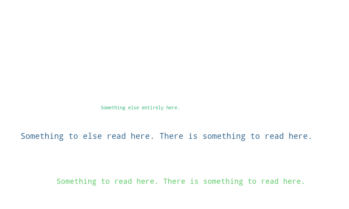

In [10]:
plt.imshow(q5, interpolation='bilinear')
plt.axis('off')
plt.show()

##### WordCloud without specific frequencies

In [11]:
q5 = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    mask=mask,
    width=1200,
    height=600)

q5.generate(string)

In [12]:
"""Recolor cloud based on preference. 
Look at matplotlib color maps for further options, if necessary."""
q5.recolor(colormap='viridis')

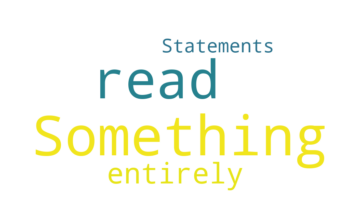

In [13]:
plt.imshow(q5, interpolation='bilinear')
plt.axis('off')
plt.show()

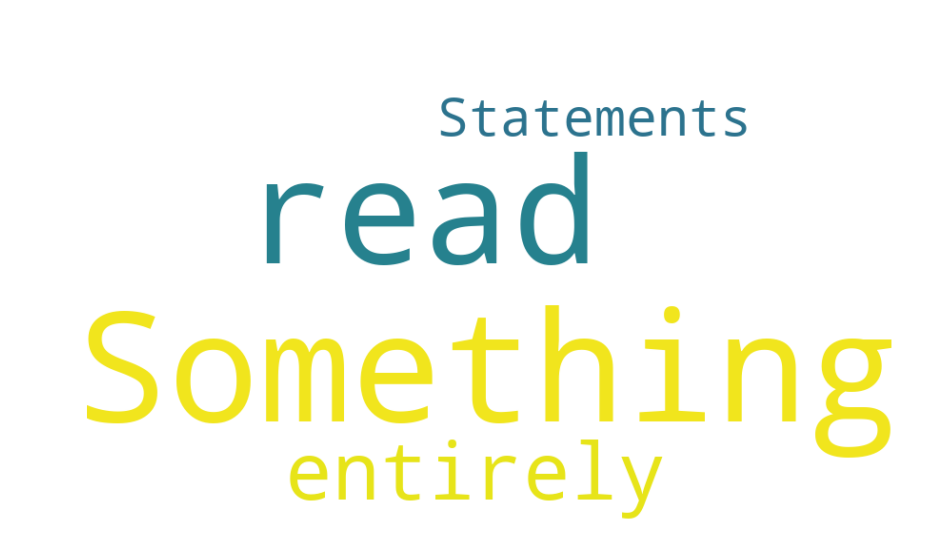

In [14]:
"Time to resize!"
fig = plt.figure()
fig.set_figwidth(30) # set width
fig.set_figheight(10) # set height

# display the cloud
plt.imshow(q5, interpolation='bilinear')
plt.axis('off')
plt.show()